In [7]:
# 定义一个函数来处理文件内容
def clean_requirements(file_path):
    # 读取原始文件
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # 处理每一行，移除 "@" 及其后的内容
    cleaned_lines = []
    with open('cleaned_requirements.txt', 'w') as file:
        for line in lines: 
            if "@" in line:
                print(line.split('@')[0])
                file.writelines(line.split('@')[0])
                cleaned_lines.append(line.split('@')[0])
            else:
                print(line)
                file.writelines(line)
                cleaned_lines.append(line)

    # 写入新的内容到同一个文件或一个新的文件

# 调用函数
clean_requirements('requirements.txt')


aiohttp==3.9.5

aiosignal==1.3.1

altair==5.3.0

annotated-types==0.7.0

anyio==4.4.0

asttokens 

async-timeout==4.0.3

attrs==23.2.0

beautifulsoup4==4.12.3

blinker==1.8.2

Bottleneck 

bs4==0.0.2

cachetools==5.4.0

certifi==2024.7.4

charset-normalizer==3.3.2

click==8.1.7

comm

dataclasses-json==0.6.7

debugpy 

decorator 
distro==1.9.0

exceptiongroup 

executing 

frozenlist==1.4.1

gitdb==4.0.11

GitPython==3.1.43

google-api-core==2.19.1

google-api-python-client==2.138.0

google-auth==2.32.0

google-auth-httplib2==0.2.0

google_search_results==2.4.2

googleapis-common-protos==1.63.2

greenlet==3.0.3

h11==0.14.0

httpcore==1.0.5

httplib2==0.22.0

httpx==0.27.0

idna==3.7

ipykernel 
ipython 
jedi 
Jinja2==3.1.4

joblib 
jsonpatch==1.33

jsonpointer==3.0.0

jsonschema==4.23.0

jsonschema-specifications==2023.12.1

jupyter_client 
jupyter_core 
langchain==0.2.11

langchain-community==0.2.10

langchain-core==0.2.24

langchain-openai==0.1.19

langchain-text-splitters==0.2.2

l

In [12]:
! pip install -r cleaned_requirements.txt

638.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Preparing metadata (setup.py) ... done
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取CSV文件
df = pd.read_csv('ACI-IoT-2023.csv')

# 获取所有的标签
labels = df['Label'].unique()

# 初始化训练集和测试集
train_df = pd.DataFrame(columns=df.columns)
test_df = pd.DataFrame(columns=df.columns)

# 处理每个标签
for label in labels:
    label_df = df[df['Label'] == label]
    if len(label_df) < 100:
        test_df = pd.concat([test_df, label_df])
        print(f"Label '{label}' has less than 100 samples, all samples are added to the test set.")
    else:
        label_train_df, label_test_df = train_test_split(label_df, test_size=0.4, random_state=42)
        train_df = pd.concat([train_df, label_train_df])
        test_df = pd.concat([test_df, label_test_df])

# 重置索引
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# 保存训练集和测试集到CSV文件
train_df.to_csv('dataset/ACIIoT/train_set.csv', index=False)
test_df.to_csv('dataset/ACIIoT/test_set.csv', index=False)

print("Training and testing datasets have been created and saved to 'train_set.csv' and 'test_set.csv'.")


/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_74014/1498520031.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_df = pd.concat([train_df, label_train_df])
/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_74014/1498520031.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_df = pd.concat([test_df, label_test_df])


Label 'ARP Spoofing' has less than 100 samples, all samples are added to the test set.
Training and testing datasets have been created and saved to 'train_set.csv' and 'test_set.csv'.


In [23]:
test_df = pd.read_csv('dataset/ACIIoT/test_set.csv')
train_df = pd.read_csv('dataset/ACIIoT/train_set.csv')


print("##Training dataset:")
for label in train_df["Label"].unique():
    label_df = train_df[train_df['Label'] == label]
    print(label, len(label_df))
    
print("##Test dataset:")
for label in test_df["Label"].unique():
    label_df = test_df[test_df['Label'] == label]
    print(label, len(label_df))
    
    


##Training dataset:
Benign 197577
ICMP Flood 135140
Slowloris 11185
SYN Flood 8314
UDP Flood 474
DNS Flood 28161
Dictionary Attack 3828
OS Scan 22514
Port Scan 264769
Ping Sweep 43156
Vulnerability Scan 23722
##Test dataset:
Benign 131718
ICMP Flood 90094
Slowloris 7458
SYN Flood 5543
UDP Flood 317
DNS Flood 18774
Dictionary Attack 2552
OS Scan 15010
Port Scan 176513
Ping Sweep 28772
Vulnerability Scan 15815
ARP Spoofing 5


In [33]:
# 处理每个标签
import pandas as pd
import numpy as np
test_df = pd.read_csv('dataset/ACIIoT/test_set.csv')
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.dropna(inplace=True)
test_small_df = pd.DataFrame(columns=df.columns)

for label in test_df["Label"].unique():
    if label == "Benign":
        label_df = test_df[test_df['Label'] == label]
        label_df_sampled = label_df.sample(n=50)
        test_small_df = pd.concat([test_small_df, label_df_sampled])
    else:
        label_df = test_df[test_df['Label'] == label]
        if len(label_df) <= 20:
            test_small_df = pd.concat([test_small_df, label_df])
            print(f"Label '{label}' has less than 100 samples, all samples are added to the test set.")
        else:
            label_test_df = label_df.sample(n=20)
            test_small_df = pd.concat([test_small_df, label_test_df])
            
test_small_df.to_csv('dataset/ACIIoT/test_set_small.csv', index=False)
print("##Test dataset:")
for label in test_small_df["Label"].unique():
    label_df = test_small_df[test_small_df['Label'] == label]
    print(label, len(label_df))


/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_74014/497558888.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_small_df = pd.concat([test_small_df, label_df_sampled])


Label 'ARP Spoofing' has less than 100 samples, all samples are added to the test set.
##Test dataset:
Benign 50
ICMP Flood 20
Slowloris 20
SYN Flood 20
UDP Flood 20
DNS Flood 20
Dictionary Attack 20
OS Scan 20
Port Scan 20
Ping Sweep 20
Vulnerability Scan 20
ARP Spoofing 5


In [31]:
# 处理每个标签
train_small_df = pd.DataFrame(columns=df.columns)

for label in train_df["Label"].unique():
    if label == "Benign":
        label_df = train_df[train_df['Label'] == label]
        label_train_df = label_df.sample(n=20000, random_state=42)
        train_small_df = pd.concat([train_small_df, label_train_df])
    if label == "Ping Sweep":
        pass
    else:
        label_df = train_df[train_df['Label'] == label]
        if len(label_df) <= 2000:
            train_small_df = pd.concat([train_small_df, label_df])
            print(f"Label '{label}' has less than 100 samples, all samples are added to the test set.")
        else:
            label_train_df = label_df.sample(n=2000, random_state=42)
            train_small_df = pd.concat([train_small_df, label_train_df])
            
train_small_df.to_csv('dataset/ACIIoT/train_set_small_without_ping_sweep.csv', index=False)
for label in train_small_df["Label"].unique():
    label_df = train_small_df[train_small_df['Label'] == label]
    print(label, len(label_df))


/var/folders/p8/grgvl0516yb122t7th7yp_v00000gn/T/ipykernel_74014/1522293436.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_small_df = pd.concat([train_small_df, label_train_df])


Label 'UDP Flood' has less than 100 samples, all samples are added to the test set.
Benign 22000
ICMP Flood 2000
Slowloris 2000
SYN Flood 2000
UDP Flood 474
DNS Flood 2000
Dictionary Attack 2000
OS Scan 2000
Port Scan 2000
Vulnerability Scan 2000


# Training model Agent

In [23]:
from langchain.agents import Tool
from langchain_community.tools.file_management.read import ReadFileTool
from langchain_community.tools.file_management.write import WriteFileTool
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import Tool
from langchain.tools import DuckDuckGoSearchRun
from langchain.tools import YouTubeSearchTool
from langchain.agents import initialize_agent
# Initialize tools
from langchain.chat_models import ChatOpenAI
import streamlit as st
from langchain_community.utilities import GoogleSearchAPIWrapper
import os


LANGCHAIN_TRACING_V2=True
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
with open("langchain_key.txt", 'r') as file:
    LANGCHAIN_API_KEY=file.readlines()[0]
LANGCHAIN_PROJECT="pr-extraneous-conspiracy-80"

with open("openai_key.txt", 'r') as file:
     key = file.readlines()[0]
llm = ChatOpenAI(model_name="gpt-3.5-turbo",
                 openai_api_key = key,
                 temperature = 0.3)




In [2]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."),
    ("user", "{input}")
])

In [3]:
chain = prompt | llm 
print(chain)
# chain.invoke({"input": "how can langsmith help with testing?"})

# convert output into message
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = prompt | llm | output_parser
chain.invoke({"input": "how can langsmith help with testing?"})

first=ChatPromptTemplate(input_variables=['input'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a world class technical documentation writer.')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))]) last=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x1136340a0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x1136361a0>, temperature=0.3, openai_api_key='sk-proj-FlBxAT3IQJpXPlnQRblBT3BlbkFJJMJMTMLaoDSS2ze5gBEv', openai_proxy='')


'Langsmith can help with testing in several ways:\n\n1. **Automated Testing**: Langsmith can be used to generate test data for automated testing. By creating realistic and diverse language variations, Langsmith can help ensure that your automated tests cover a wide range of scenarios.\n\n2. **Localization Testing**: Langsmith can generate localized content for testing purposes. This can help ensure that your software or website functions correctly in different languages and cultures.\n\n3. **Accessibility Testing**: Langsmith can generate text in different formats and styles to test the accessibility features of your application. This can help ensure that your product is usable by people with different needs and preferences.\n\n4. **Load Testing**: Langsmith can generate a large volume of text to simulate heavy usage and test the performance of your application under load. This can help identify bottlenecks and optimize your system for scalability.\n\n5. **Regression Testing**: Langsmi

In [10]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
with open("longchain_key.txt", 'r') as file:
    os.environ["LANGCHAIN_API_KEY"] = file.readlines()[0]


In [15]:
from langchain_core.tools import tool


@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

In [18]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [19]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

In [24]:

llm_with_tools = llm.bind_tools([multiply])
msg = llm_with_tools.invoke("whats 5 times forty two")
msg.tool_calls


NotImplementedError: 

In [27]:
# Get the prompt to use - can be replaced with any prompt that includes variables "agent_scratchpad" and "input"!

from langchain import hub
from langchain.agents import AgentExecutor, create_tool_calling_agent
# Get the prompt to use - can be replaced with any prompt that includes variables "agent_scratchpad" and "input"!
prompt = hub.pull("hwchase17/openai-tools-agent")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant

============================= Messages Placeholder =============================

{chat_history}

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [ ]:
!source ~/.zshrc


In [ ]:
google_search = GoogleSearchAPIWrapper()
search_tool = Tool(
    name="google_search",
    description="Search Google for recent results.",
    func=google_search.run,
)
# search = DuckDuckGoSearchRun()
# search_tool = Tool(name = "search_tool", description="search the net", func= search.run)
yt = YouTubeSearchTool()
yt_tool = Tool(name="youtube", description="youtube search for video", func = yt.run)

tools = [search_tool, yt_tool]
agent = initialize_agent(tools=tools, llm=llm, agent = "zero-shot-react-description",
                         verbose=True)

In [ ]:
from langchain.agents import Tool
from langchain_community.tools.file_management.read import ReadFileTool
from langchain_community.tools.file_management.write import WriteFileTool
from langchain_community.utilities import SerpAPIWrapper
from langchain.agents import Tool
from langchain.tools import DuckDuckGoSearchRun
from langchain.tools import YouTubeSearchTool
from langchain.agents import initialize_agent
# Initialize tools
from langchain.chat_models import ChatOpenAI
import streamlit as st
from langchain_community.utilities import GoogleSearchAPIWrapper
import os

llm = ChatOpenAI(model_name="gpt-3.5-turbo",
                 openai_api_key = os.environ["OPENAI_KEY"],
                 temperature = 0.3)

google_search = GoogleSearchAPIWrapper()
search_tool = Tool(
    name="google_search",
    description="Search Google for recent results.",
    func=google_search.run,
)
# search = DuckDuckGoSearchRun()
# search_tool = Tool(name = "search_tool", description="search the net", func= search.run)
yt = YouTubeSearchTool()
yt_tool = Tool(name="youtube", description="youtube search for video", func = yt.run)

tools = [search_tool, yt_tool]
agent = initialize_agent(tools=tools, llm=llm, agent = "zero-shot-react-description",
                         verbose=True)

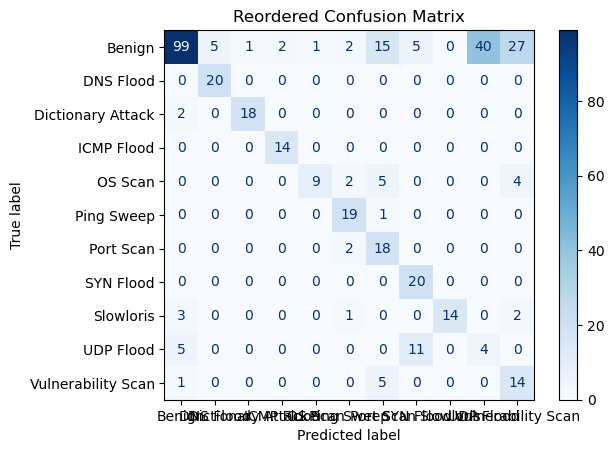

                    precision    recall  f1-score   support

            Benign       0.90      0.50      0.64       197
         DNS Flood       0.80      1.00      0.89        20
 Dictionary Attack       0.95      0.90      0.92        20
        ICMP Flood       0.88      1.00      0.93        14
           OS Scan       0.90      0.45      0.60        20
        Ping Sweep       0.73      0.95      0.83        20
         Port Scan       0.41      0.90      0.56        20
         SYN Flood       0.56      1.00      0.71        20
         Slowloris       1.00      0.70      0.82        20
         UDP Flood       0.09      0.20      0.12        20
Vulnerability Scan       0.30      0.70      0.42        20

          accuracy                           0.64       391
         macro avg       0.68      0.75      0.68       391
      weighted avg       0.78      0.64      0.66       391



In [42]:
# context learning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Original confusion matrix
confusion_matrix = np.array([
    [99, 2, 2, 15, 27, 1, 1, 5, 40, 5, 0, 3],
    [0, 19, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 6],
    [0, 2, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 5, 14, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 5, 4, 9, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0],
    [5, 0, 0, 0, 0, 0, 0, 0, 4, 11, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0],
    [3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 14, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]
])

# Original labels
labels = [
    "Benign", "Ping Sweep", "ICMP Flood", "Port Scan", "Vulnerability Scan",
    "OS Scan", "Dictionary Attack", "DNS Flood", "UDP Flood", "SYN Flood",
    "Slowloris", "ARP Spoofing"
]

# Desired label order
desired_order = [
    "Benign", "DNS Flood", "Dictionary Attack", "ICMP Flood", "OS Scan",
    "Ping Sweep", "Port Scan", "SYN Flood", "Slowloris", "UDP Flood",
    "Vulnerability Scan"
]

# Get the indices of the desired order
indices = [labels.index(label) for label in desired_order]

# Reorder the confusion matrix according to the desired label order
reordered_confusion_matrix = confusion_matrix[np.ix_(indices, indices)]
reordered_labels = [labels[i] for i in indices]

# Plot the reordered confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=reordered_confusion_matrix, display_labels=reordered_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Reordered Confusion Matrix")
plt.show()

# Generate synthetic y_true and y_pred based on the reordered confusion matrix
y_true = []
y_pred = []

for i, row in enumerate(reordered_confusion_matrix):
    for j, count in enumerate(row):
        y_true.extend([reordered_labels[i]] * count)
        y_pred.extend([reordered_labels[j]] * count)

# Calculate and print the classification report
report = classification_report(y_true, y_pred, target_names=reordered_labels)
print(report)


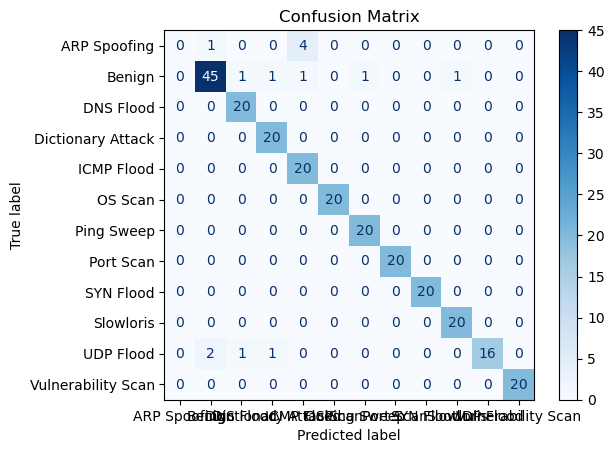

                    precision    recall  f1-score   support

            Benign       0.96      0.90      0.93        50
         DNS Flood       0.91      1.00      0.95        20
 Dictionary Attack       0.91      1.00      0.95        20
        ICMP Flood       0.95      1.00      0.98        20
           OS Scan       1.00      1.00      1.00        20
        Ping Sweep       0.95      1.00      0.98        20
         Port Scan       1.00      1.00      1.00        20
         SYN Flood       1.00      1.00      1.00        20
         Slowloris       0.95      1.00      0.98        20
         UDP Flood       1.00      0.80      0.89        20
Vulnerability Scan       1.00      1.00      1.00        20

          accuracy                           0.96       250
         macro avg       0.97      0.97      0.97       250
      weighted avg       0.97      0.96      0.96       250



In [38]:
# Aggresive

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Manually creating the confusion matrix from the image
confusion_matrix = np.array([
    [0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    [0, 45, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0],
    [0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 16, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20]
])

labels = ['ARP Spoofing', 'Benign', 'DNS Flood', 'Dictionary Attack', 'ICMP Flood', 'OS Scan', 'Ping Sweep', 'Port Scan', 'SYN Flood', 'Slowloris', 'UDP Flood', 'Vulnerability Scan']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Remove the first row and first column
modified_confusion_matrix = confusion_matrix[1:, 1:]
modified_labels = labels[1:]

# Generate synthetic y_true and y_pred based on the modified confusion matrix
y_true = []
y_pred = []

for i, row in enumerate(modified_confusion_matrix):
    for j, count in enumerate(row):
        y_true.extend([modified_labels[i]] * count)
        y_pred.extend([modified_labels[j]] * count)

# Calculate and print the classification report
report = classification_report(y_true, y_pred, target_names=modified_labels)
print(report)


                    precision    recall  f1-score   support

            Benign       0.87      0.96      0.91        49
         DNS Flood       0.91      1.00      0.95        20
 Dictionary Attack       1.00      1.00      1.00        20
        ICMP Flood       0.95      1.00      0.98        20
           OS Scan       1.00      1.00      1.00        20
        Ping Sweep       1.00      1.00      1.00        20
         Port Scan       1.00      1.00      1.00        20
         SYN Flood       1.00      1.00      1.00        20
         Slowloris       1.00      1.00      1.00        20
         UDP Flood       1.00      0.53      0.69        17
Vulnerability Scan       1.00      1.00      1.00        20

          accuracy                           0.96       246
         macro avg       0.98      0.95      0.96       246
      weighted avg       0.96      0.96      0.96       246



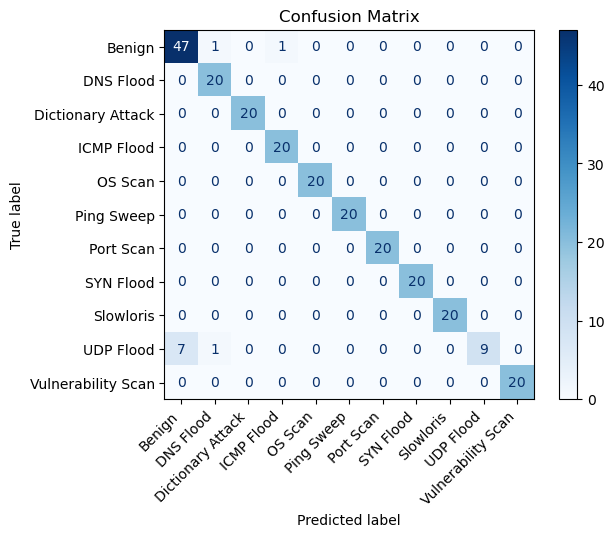

In [54]:
# Balanced


import numpy as np
from sklearn.metrics import classification_report

# Original confusion matrix
confusion_matrix = np.array([
    [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 47, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0],
    [0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20]
])

# Corresponding labels
labels = [
    "ARP Spoofing", "Benign", "DNS Flood", "Dictionary Attack", "ICMP Flood",
    "OS Scan", "Ping Sweep", "Port Scan", "SYN Flood", "Slowloris", "UDP Flood", "Vulnerability Scan"
]

# Remove the first row and first column
modified_confusion_matrix = confusion_matrix[1:, 1:]
modified_labels = labels[1:]

# Generate synthetic y_true and y_pred based on the modified confusion matrix
y_true = []
y_pred = []

for i, row in enumerate(modified_confusion_matrix):
    for j, count in enumerate(row):
        y_true.extend([modified_labels[i]] * count)
        y_pred.extend([modified_labels[j]] * count)

# Calculate and print the classification report
report = classification_report(y_true, y_pred, target_names=modified_labels)
print(report)
disp = ConfusionMatrixDisplay(confusion_matrix=modified_confusion_matrix, display_labels=modified_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()


In [39]:
# conservative

import numpy as np
from sklearn.metrics import classification_report

# Updated confusion matrix
confusion_matrix = np.array([
    [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 49, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 7, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0],
    [0, 12, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
    [0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 9, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20]
])

# Corresponding labels
labels = [
    "ARP Spoofing", "Benign", "DNS Flood", "Dictionary Attack", "ICMP Flood",
    "OS Scan", "Ping Sweep", "Port Scan", "SYN Flood", "Slowloris", "UDP Flood", "Vulnerability Scan"
]

# Remove the first row and first column
modified_confusion_matrix = confusion_matrix[1:, 1:]
modified_labels = labels[1:]

# Generate synthetic y_true and y_pred based on the modified confusion matrix
y_true = []
y_pred = []

for i, row in enumerate(modified_confusion_matrix):
    for j, count in enumerate(row):
        y_true.extend([modified_labels[i]] * count)
        y_pred.extend([modified_labels[j]] * count)

# Calculate and print the classification report
report = classification_report(y_true, y_pred, target_names=modified_labels)
print(report)


                    precision    recall  f1-score   support

            Benign       0.60      0.98      0.75        50
         DNS Flood       0.94      0.80      0.86        20
 Dictionary Attack       1.00      0.65      0.79        20
        ICMP Flood       0.95      1.00      0.98        20
           OS Scan       1.00      1.00      1.00        20
        Ping Sweep       1.00      1.00      1.00        20
         Port Scan       1.00      1.00      1.00        20
         SYN Flood       1.00      1.00      1.00        20
         Slowloris       1.00      0.40      0.57        20
         UDP Flood       1.00      0.47      0.64        19
Vulnerability Scan       1.00      1.00      1.00        20

          accuracy                           0.86       249
         macro avg       0.95      0.85      0.87       249
      weighted avg       0.91      0.86      0.86       249



                    precision    recall  f1-score   support

            Benign       0.84      0.98      0.91        50
         DNS Flood       0.95      1.00      0.98        20
 Dictionary Attack       1.00      1.00      1.00        20
        ICMP Flood       0.95      1.00      0.98        20
           OS Scan       1.00      1.00      1.00        20
        Ping Sweep       1.00      1.00      1.00        20
         Port Scan       1.00      1.00      1.00        20
         SYN Flood       1.00      1.00      1.00        20
         Slowloris       1.00      1.00      1.00        20
         UDP Flood       1.00      0.44      0.62        18
Vulnerability Scan       1.00      1.00      1.00        20

          accuracy                           0.96       248
         macro avg       0.98      0.95      0.95       248
      weighted avg       0.96      0.96      0.95       248



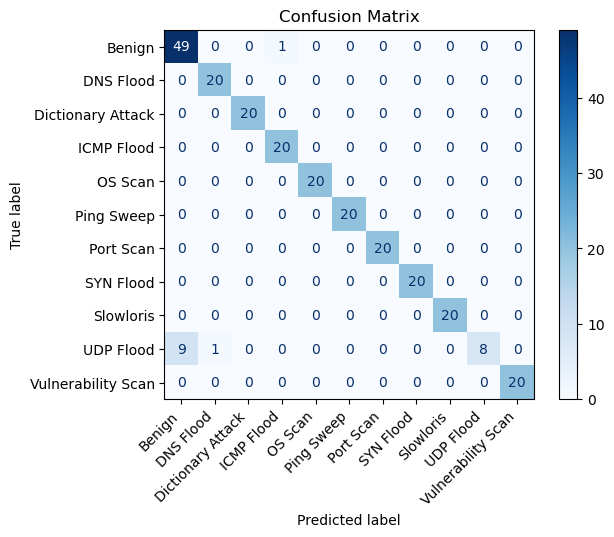

In [55]:
#model numbder is 5, balanced
import numpy as np
from sklearn.metrics import classification_report

# Updated confusion matrix
confusion_matrix = np.array([
    [0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 49, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0],
    [0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 8, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20]
])

# Corresponding labels
labels = [
    "ARP Spoofing", "Benign", "DNS Flood", "Dictionary Attack", "ICMP Flood",
    "OS Scan", "Ping Sweep", "Port Scan", "SYN Flood", "Slowloris", "UDP Flood", "Vulnerability Scan"
]

# Remove the first row and first column
modified_confusion_matrix = confusion_matrix[1:, 1:]
modified_labels = labels[1:]

# Generate synthetic y_true and y_pred based on the modified confusion matrix
y_true = []
y_pred = []

for i, row in enumerate(modified_confusion_matrix):
    for j, count in enumerate(row):
        y_true.extend([modified_labels[i]] * count)
        y_pred.extend([modified_labels[j]] * count)

# Calculate and print the classification report
report = classification_report(y_true, y_pred, target_names=modified_labels)
print(report)
disp = ConfusionMatrixDisplay(confusion_matrix=modified_confusion_matrix, display_labels=modified_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()



                    precision    recall  f1-score   support

            Benign       0.98      0.98      0.98     19747
         DNS Flood       1.00      0.99      0.99      2794
 Dictionary Attack       0.95      0.94      0.94       339
        ICMP Flood       1.00      1.00      1.00     13528
           OS Scan       0.23      0.03      0.05      2307
        Ping Sweep       0.42      0.10      0.16      4218
         Port Scan       0.81      0.97      0.88     26622
         SYN Flood       0.96      0.96      0.96       818
         Slowloris       0.98      0.99      0.98      1138
         UDP Flood       0.47      0.18      0.26        45
Vulnerability Scan       0.96      0.95      0.96      2328

          accuracy                           0.90     73884
         macro avg       0.80      0.73      0.74     73884
      weighted avg       0.87      0.90      0.87     73884



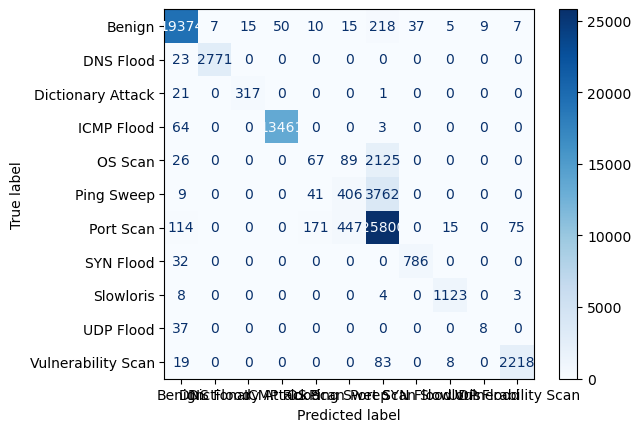

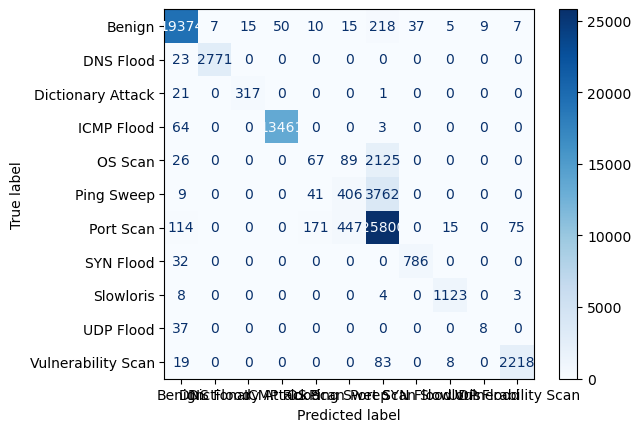

                    precision    recall  f1-score   support

            Benign       0.98      0.98      0.98    131718
         DNS Flood       1.00      0.99      0.99     18774
 Dictionary Attack       0.96      0.94      0.95      2552
        ICMP Flood       1.00      0.99      0.99     90094
           OS Scan       0.26      0.04      0.07     15010
        Ping Sweep       0.43      0.10      0.16     28772
         Port Scan       0.81      0.97      0.88    176513
         SYN Flood       0.97      0.97      0.97      5543
         Slowloris       0.98      0.99      0.98      7458
         UDP Flood       0.39      0.19      0.26       317
Vulnerability Scan       0.96      0.95      0.96     15815

          accuracy                           0.90    492566
         macro avg       0.79      0.74      0.74    492566
      weighted avg       0.87      0.90      0.87    492566


False Negative Rate (FNR) for each class:
Benign: 0.02
DNS Flood: 0.01
Dictionary Attack: 0.06
I

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
from sklearn.preprocessing import StandardScaler

def calculate_fnr(confusion_matrix, labels):
    fnr = {}
    for i, label in enumerate(labels):
        fn = confusion_matrix[i, :].sum() - confusion_matrix[i, i]
        tp = confusion_matrix[i, i]
        fnr[label] = fn / (fn + tp) if (fn + tp) > 0 else 0
    return fnr


# Load your dataset
df = pd.read_csv('dataset/ACIIoT/train_set.csv')
# Make sure your dataset contains the features shown in the image.

# Example dataset loading
# df = pd.read_csv('path_to_your_dataset.csv')

# Specify the features based on the image
selected_features = [
    'FWD Init Win Bytes',
    'Flow IAT Std',
    'SYN Flag Count',
    'FIN Flag Count',
    'Subflow Fwd Bytes',
    'Flow IAT Mean',
    'Bwd Packets/s',
    'Packet Length Variance',
    'Flow IAT Min',
    'Active Std',
    "Total Length of Fwd Packet",
    'Fwd PSH Flags',
    'Fwd IAT Std',
    'Active Max',
    'Fwd Packet Length Max',
    'RST Flag Count',
    'Total Length of Bwd Packet',
    'Flow IAT Max',
    'URG Flag Count',
    'Bwd IAT Max',
    'CWR Flag Count'
]

# Assuming the target variable is labeled as 'Label'
X = df[selected_features]
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Random Forest model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
joblib.dump(model, f'models/random_forest_joblib.joblib')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
labels =  display_labels=model.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


"""Load model, classify data, and plot confusion matrix."""
test_file_path = 'dataset/ACIIoT/test_set.csv'

df = pd.read_csv(test_file_path)
df = df[df['Label'] != 'ARP Spoofing']

# Extract true labels and drop them from the dataset
y_true = df['Label'].values

# Preprocess the data
X = df[selected_features]
X_scaled = scaler.transform(X)
# Predict the labels
y_pred = model.predict(X_scaled)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


from sklearn.metrics import classification_report
# Calculate and print the classification report
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate and print the False Negative Rate (FNR)
fnr = calculate_fnr(cm, labels)
print("\nFalse Negative Rate (FNR) for each class:")
for label, rate in fnr.items():
    print(f"{label}: {rate:.2f}")

# 5 model, aggressive
[[ 0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0 44  2  1  1  0  1  0  0  1  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  1  1  1  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20]]
                    precision    recall  f1-score   support

            Benign       0.98      0.88      0.93        50
         DNS Flood       0.87      1.00      0.93        20
 Dictionary Attack       0.91      1.00      0.95        20
        ICMP Flood       0.95      1.00      0.98        20
           OS Scan       1.00      1.00      1.00        20
        Ping Sweep       0.95      1.00      0.98        20
         Port Scan       1.00      1.00      1.00        20
         SYN Flood       1.00      1.00      1.00        20
         Slowloris       0.95      1.00      0.98        20
         UDP Flood       1.00      0.85      0.92        20
Vulnerability Scan       1.00      1.00      1.00        20

          accuracy                           0.96       250
         macro avg       0.96      0.98      0.97       250
      weighted avg       0.97      0.96      0.96       250